# Prog6280b - Starbucks

In [6]:
%pip install pandas seaborn matplotlib -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.exe -m pip install --upgrade pip


In [7]:
# Read dataset into dataframe
df = pd.read_csv('../data/starbucks.csv')
df.columns = df.columns.str.strip()  # Get rid of trailing spaces in column names
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [9]:
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


## Task 1: Caloric Content Across Beverage Categories

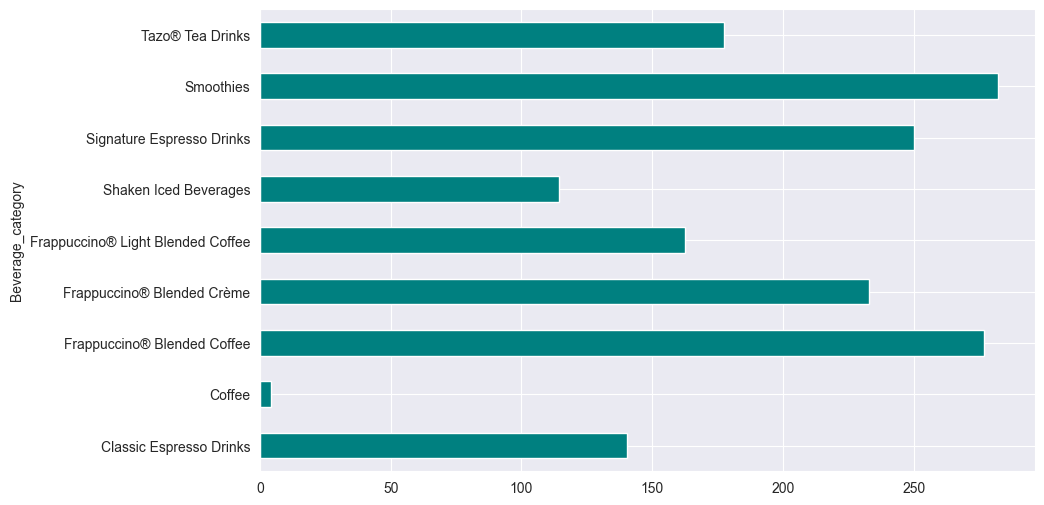

In [10]:
plt.figure(figsize=(10,6))
df.groupby('Beverage_category')['Calories'].mean().plot(kind='barh', color='teal')
# ...
plt.show()